## DS CHALLENGE FOR AWAKE LABS

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Necessary libraries for plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Boosting model
from xgboost.sklearn import XGBClassifier
import time

# Metrics (Computation)
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Neural Network for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model interpretation
import shap

# To "pickle" things, like accuracies or even an entire fitted model
import joblib
import pickle

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the file to be used
df = pd.read_csv("Dataset for DS Challenge.csv")

# Looking at the first five rows of the dataset
df.head()

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  63.0  1.0  3.0   145.0  233.0  1.0      0.0     150.0   0.0      2.3  0.0   
1  37.0  1.0  2.0   130.0  250.0  0.0      1.0     187.0   0.0      3.5  0.0   
2  41.0  0.0  1.0   130.0  204.0  0.0      0.0     172.0   0.0      1.4  2.0   
3  56.0  1.0  1.0   120.0  236.0  0.0      1.0     178.0   0.0      0.8  2.0   
4  57.0  0.0  0.0   120.0  354.0  0.0      1.0     163.0   1.0      0.6  2.0   

   caa  thall  output  o2Saturation  
0  0.0    1.0     1.0          98.6  
1  0.0    2.0     1.0          98.6  
2  0.0    2.0     1.0          98.6  
3  0.0    2.0     1.0          98.6  
4  0.0    2.0     1.0          98.1

## Dataset Components:

**VARIABLES:**

- age: Age of the patient
- sex: Sex of the patient
- cp: Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 =
Asymptomatic
- trtbps: Resting blood pressure (in mm Hg)
- chol: Cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg: Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave abnormality, 2 = Left
ventricular hypertrophy
- thalachh: Maximum heart rate achieved
- oldpeak: Previous peak
- slp: Slope
- caa: Number of major vessels
- thall: Thalium Stress Test result ~ (0,3)
- exng: Exercise induced angina ~ 1 = Yes, 0 = No
- o2Saturation: Blood oxygen saturation (%)

**TARGET VARIABLE**

- output :  0 = no or less chance of heart attack, 1 = more chance of heart attack

In [3]:
# Looking at the last five rows of the dataset
df.tail()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
3581  NaN  NaN NaN     NaN   NaN  NaN      NaN       NaN   NaN      NaN  NaN   
3582  NaN  NaN NaN     NaN   NaN  NaN      NaN       NaN   NaN      NaN  NaN   
3583  NaN  NaN NaN     NaN   NaN  NaN      NaN       NaN   NaN      NaN  NaN   
3584  NaN  NaN NaN     NaN   NaN  NaN      NaN       NaN   NaN      NaN  NaN   
3585  NaN  NaN NaN     NaN   NaN  NaN      NaN       NaN   NaN      NaN  NaN   

      caa  thall  output  o2Saturation  
3581  NaN    NaN     NaN          98.6  
3582  NaN    NaN     NaN          98.6  
3583  NaN    NaN     NaN          98.6  
3584  NaN    NaN     NaN          98.6  
3585  NaN    NaN     NaN          98.6

**Observation**
- There seems to be missing values for all the columns except o2saturation
- Proceed to see the extent of missing values

In [4]:
for col in df.columns:
    
    if df[col].isnull().sum() > 0:
        
        print(col, df[col].isnull().mean())

age 0.9155047406581149
sex 0.9155047406581149
cp 0.9155047406581149
trtbps 0.9155047406581149
chol 0.9155047406581149
fbs 0.9155047406581149
restecg 0.9155047406581149
thalachh 0.9155047406581149
exng 0.9155047406581149
oldpeak 0.9155047406581149
slp 0.9155047406581149
caa 0.9155047406581149
thall 0.9155047406581149
output 0.9155047406581149


**Observation**

With over 90% missing values in other columns, will drop the o2Saturation column

In [5]:
# Checking the unique values in "o2Saturation" column
df['o2Saturation'].value_counts()

98.6    1662
97.5     704
97.6     579
99.6     359
96.5     104
98.2      32
98.0      29
97.9      25
98.1      23
99.3      21
98.8      13
97.1       9
97.0       9
98.9       8
96.9       5
97.2       3
98.3       1
Name: o2Saturation, dtype: int64

In [6]:
# the "o2Saturation" column will be dropped and proceed with other predictive features
df = df.drop(columns=['o2Saturation'])

# Drop row if it does not have at least two values that are not NaN
df = df.dropna(thresh=2) 

In [7]:
# Confirm if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no more missing values

## EDA AND DATA PREPROCESSING

In [8]:
#  check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trtbps    303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalachh  303 non-null    float64
 8   exng      303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    float64
 11  caa       303 non-null    float64
 12  thall     303 non-null    float64
 13  output    303 non-null    float64
dtypes: float64(14)
memory usage: 35.5 KB


In [9]:
# Check the shape of the dataframe
df.shape
print(f"The df has {df.shape[0]} rows and {df.shape[1]} columns")

The df has 303 rows and 14 columns


In [10]:
# Checking for duplicates
# Columns 
print(f'Duplicated columns: {df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: True


In [11]:
# Summary statistics for the dataset
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trtbps    303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalachh  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exng      303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slp       303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
caa       303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thall     303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
output    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

### Bivariate Analysis - Categorical Variables
**Evaluating the relationship between the categorical features and the target**

In [12]:
categorical_col = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

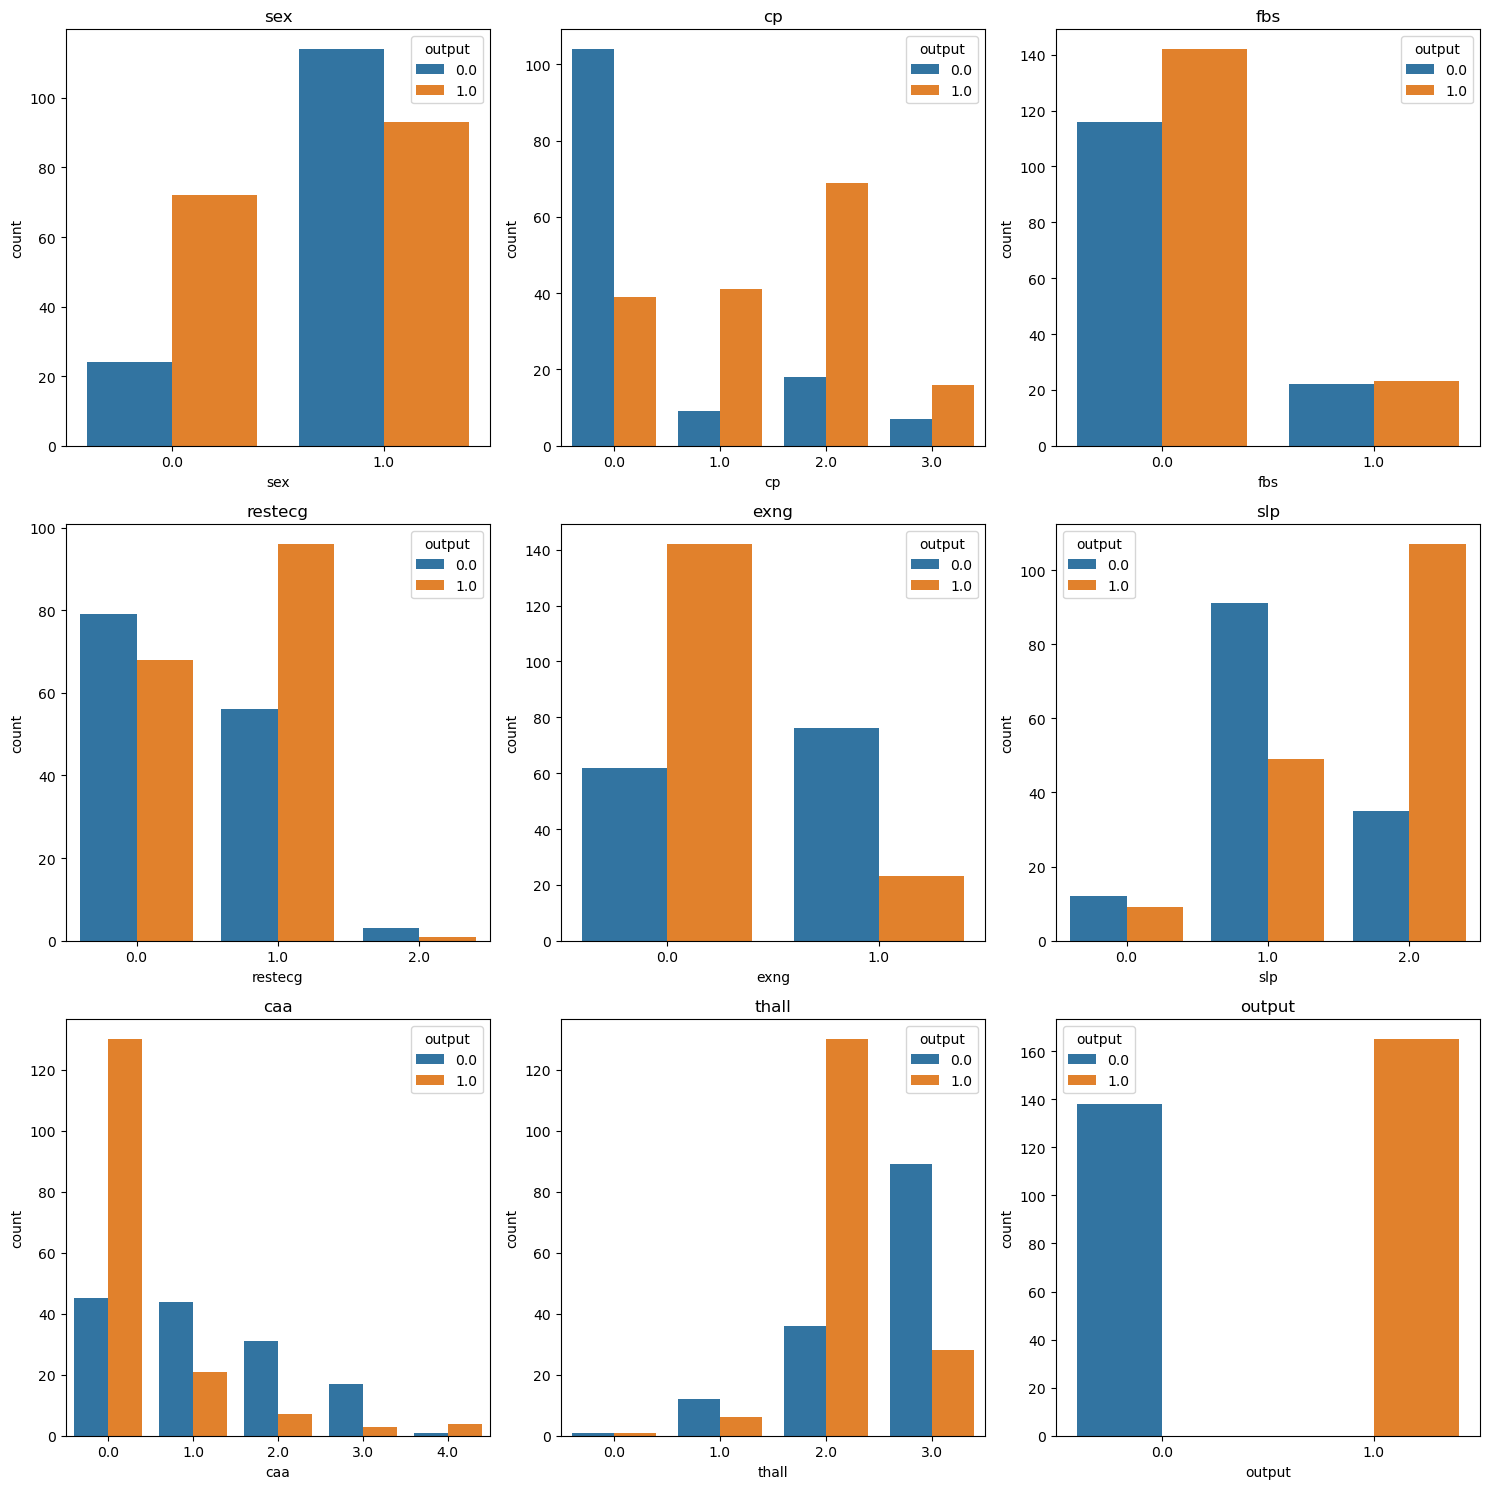

In [13]:
# Set up grid of subplots
plt.subplots (3, 3, figsize = (15, 15))

# Initialize counter
plot_num = 1

categorical_df = df.loc[:, categorical_col]

# Loop through column names in list
for i in categorical_col:
    plt.subplot(3, 3, plot_num)
    sns.countplot(x = i, data = categorical_df, hue = "output")
    plt.title(i)
    
    plot_num +=1
    
plt.tight_layout()

plt.show()

**Insights:**

- With the sex column not specified, assuming 1 is male and 0 is female, there is a high chance of heart attack in males than females
- Fasting blood sugar > 120mg/dl also shows a higher chance of heart attack
- Also, with the restecg at 1 having a high chance of heart attack, this shows that ST-T wave abnormality also poses a high chance of heart attack
- Thallium stress test of 2 also is observed to show a high chance of heart attack


### Bivariate Analysis - Numerical Variables

**Evaluating the relationship between the numerical features and the target**

In [14]:
numerical_col = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]

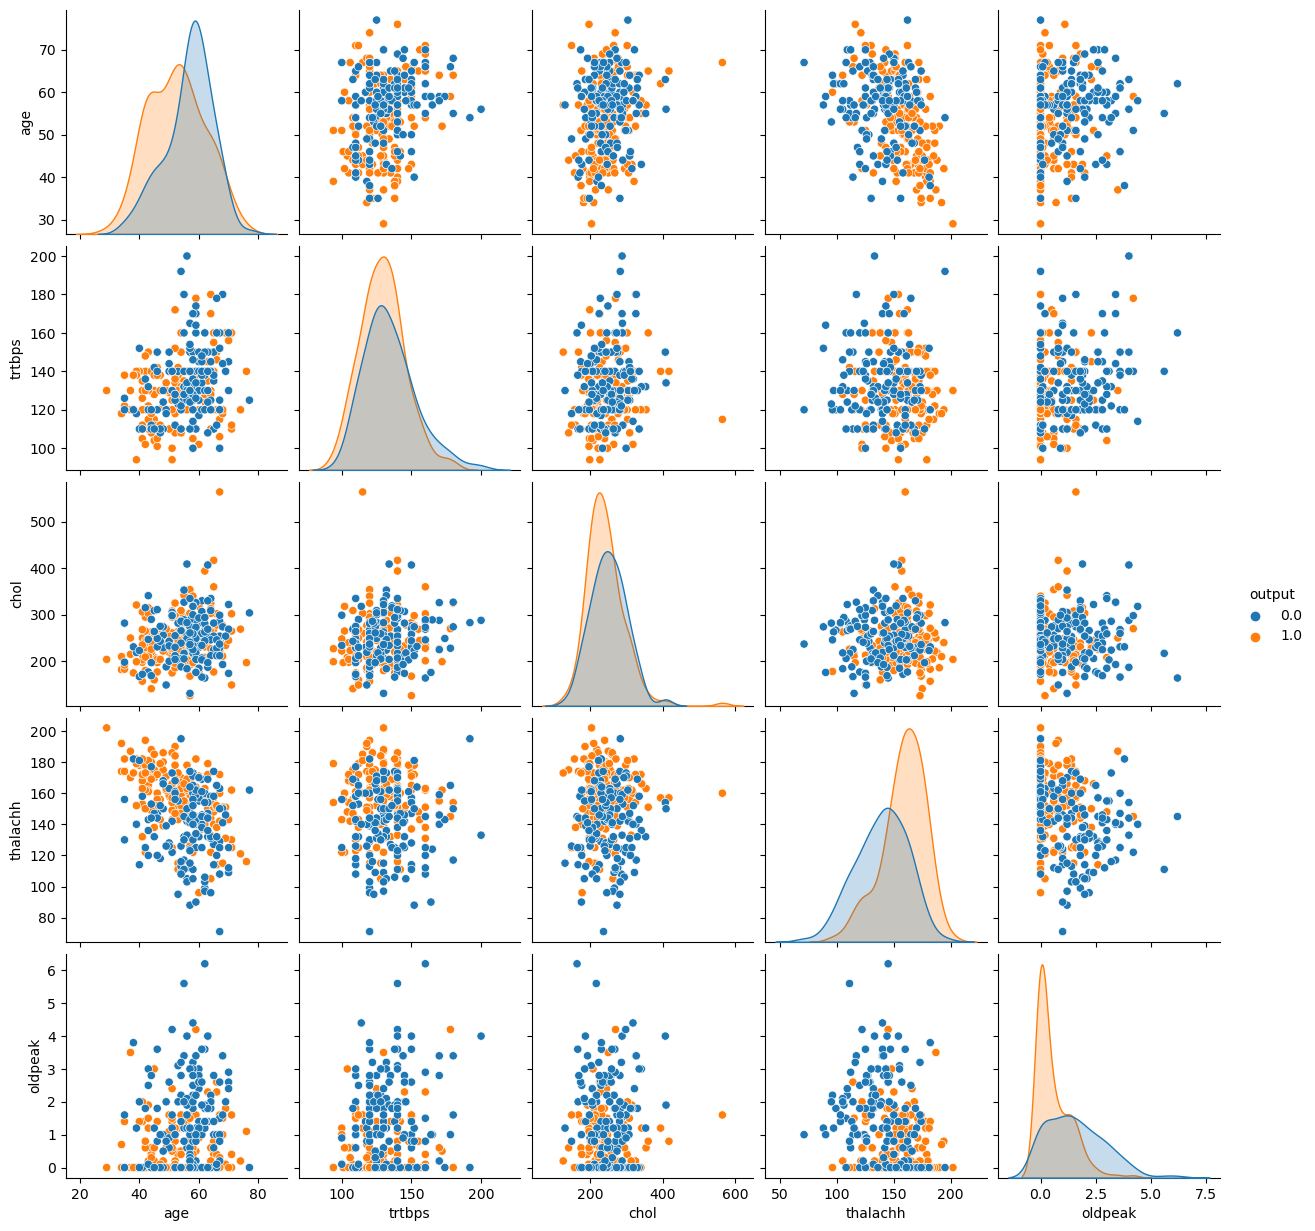

In [15]:
numerical_df = df.loc[:, numerical_col]
sns.pairplot(numerical_df, hue = "output", diag_kind = "kde")
plt.show()

In [16]:
# Visualizing the age and sex columns and chance of heart attack

fig = px.box(df, x="sex", y="age", color="output",
             title="Chances of heart attack according to sex and age")
fig.show()

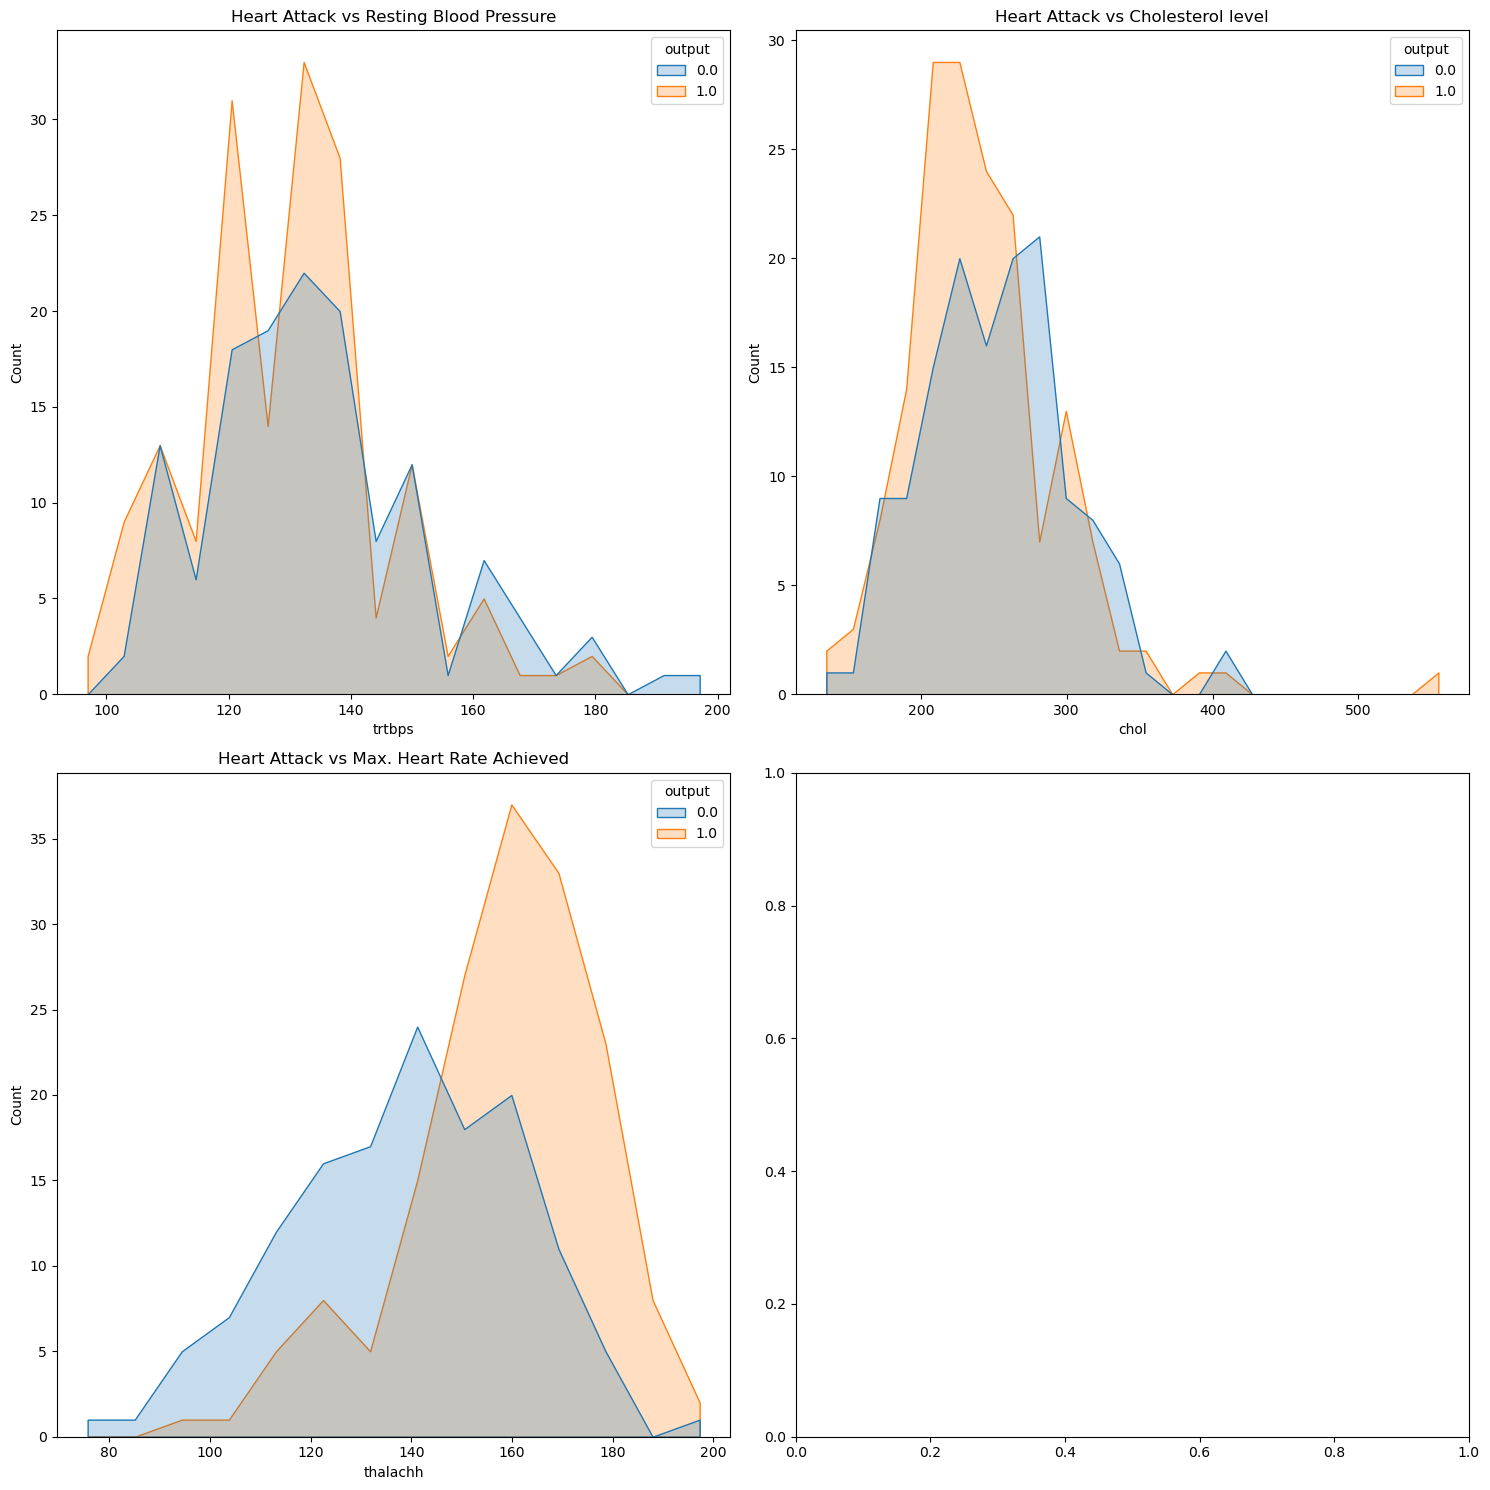

In [17]:
plt.subplots(2, 2, figsize = (15, 15)) 

plt.subplot(2, 2, 1)
sns.histplot(data=df, x="trtbps", hue="output", element="poly")
plt.title('Heart Attack vs Resting Blood Pressure')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="chol", hue="output", element="poly")
plt.title('Heart Attack vs Cholesterol level')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="thalachh", hue="output", element="poly")
plt.title('Heart Attack vs Max. Heart Rate Achieved')

plt.tight_layout()

plt.show()

**Insights:**

- Resting blood pressure between 120 - 140mmHg has high occurence of heart attack
- Below 120mmHg is considered normal, 120mmHg and above is considered elevated and 140mmHg is flagged Stage 2 high blood pressure
- From the age column, it is observed that the older one gets, the higher the chance of a heart attack
- Also, increased resting blood pressure and cholesterol levels also increases the chances of a heart attack
- In adults, the total cholesterol levels are considered great at less than 200 milligram per decilitre ( mg / dL). Borderlines are considered to be high between 200 to 239 mg / dL and 240 mg / dL and above which is seen to pose higher risk of heart attack 
- From the age and sex distribution, we see an age range of 29 - 70 for males and 34 - 76 for males as age range of the distribution. 
- We see a median age for a likely chance of heart attack of 54 in females and in males an earlier age of 52. 
- The risk of a heart attack in males seems to start and steadily increase from an earlier age of 29
- There is also a chance of heart attack in later ages for females

In [18]:
# Correlation between independent variables
df_corr = df.corr()
df_corr

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

Heatmap


<AxesSubplot:>

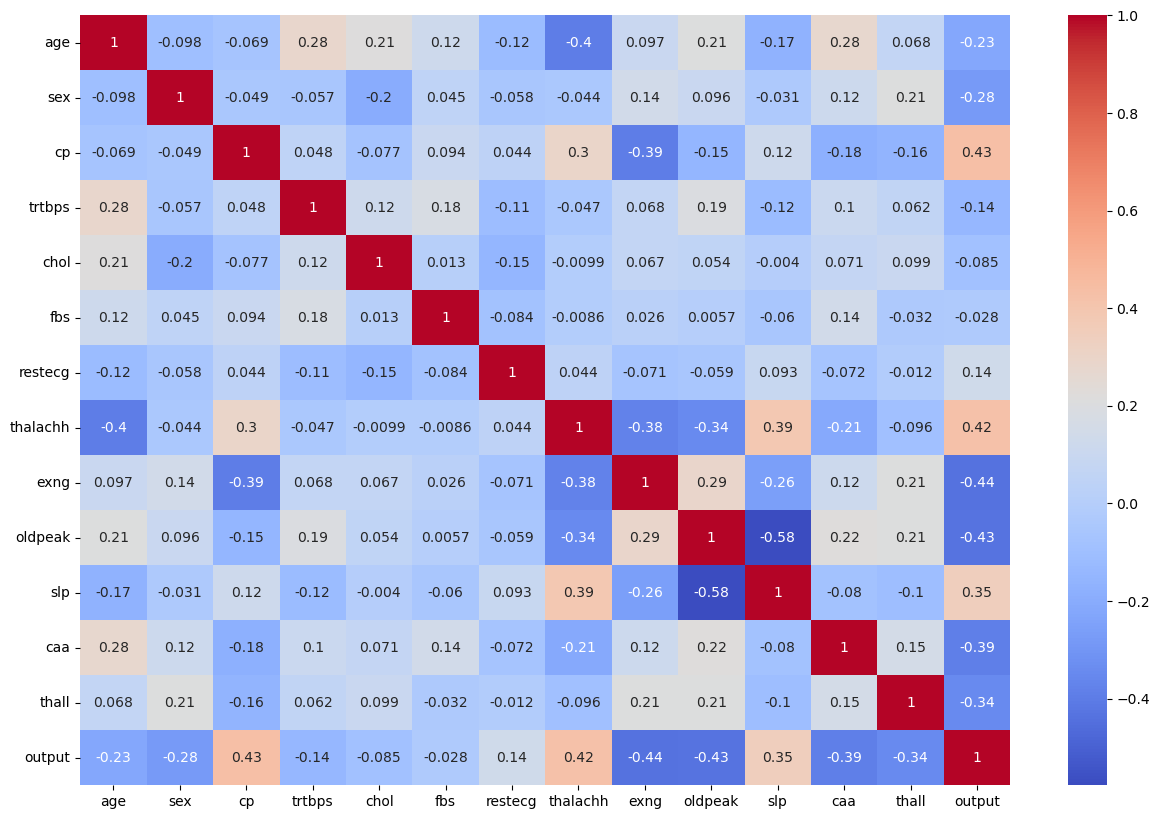

In [19]:
print('Heatmap')
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

There is no strong correlations between the features in the dataset as the correlation coefficient is not above 0.5. We will go ahead and do model evaluation and fitting

## MODEL FITTING

- Split the data into training and testing sets
- Scale the data
- Fit different models to the data and compare model performance

In [20]:
# Set the features 
X = df.drop('output', axis=1)

# Set the target
y = df['output']

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify = y,
                                                    random_state=1)

In [21]:
print("Shape of the data after split:",X_train.shape)
print("Shape of the data after split:",X_test.shape)

Shape of the data after split: (227, 13)
Shape of the data after split: (76, 13)


In [22]:
# Scale the data
# Define and fit the scaler
scaler = StandardScaler().fit(X_train)

# Transform the train and test data
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_ss, columns = X.columns)

X_test = pd.DataFrame(X_test_ss, columns=X.columns)

### Fitting a Logistic Regression model

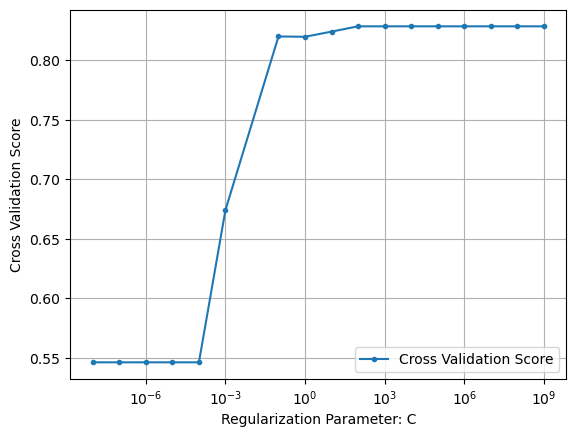

The best model has C =  100.0


In [23]:
###Employing a 5-fold cross validation and Log Regression model ###

# Import cross_val_score for cross validation
from sklearn.model_selection import cross_val_score

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    
    # Instantiate model
    LR_model = LogisticRegression(C=c,random_state=1)
    
    # Using a 5-fold cross validation
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

We can see here that the best logistic regression model to fit the data is for C = 100

- Refit the train data with the C- value to find the test accuracy

In [24]:
# Choosing C=100 from the plot above, fit the model 

logreg = LogisticRegression(C = 100)

# Fit the model
logreg.fit(X_train, y_train)

# Make predictions 
y_pred_train = logreg.predict(X_train)
y_pred_LR = logreg.predict(X_test)

# Training and test score
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_LR, squared=False))
print(f'Test MAE ---- {mean_absolute_error(y_test, y_pred_LR)}')
print(f"Logreg Train score: {logreg.score(X_train, y_train)}")
print(f"Logreg Test score: {logreg.score(X_test, y_test)}")

LR_accuracy = logreg.score(X_test, y_test)
LR_RMSE = mean_squared_error(y_test, y_pred_LR, squared=False)

Root Mean squared error: 0.40
Test MAE ---- 0.15789473684210525
Logreg Train score: 0.8634361233480177
Logreg Test score: 0.8421052631578947


In [25]:
# Instantiate the regression coefficient 
coefficient = logreg.coef_

# The coefficients
print("Coefficients: \n", logreg.coef_)

Coefficients: 
 [[-0.21666883 -0.90146486  0.98186715 -0.37535476 -0.17007438  0.09329314
   0.18036805  0.54886395 -0.29683714 -0.64714327  0.28817282 -0.6733066
  -0.43685702]]


In [26]:
# Put the variable names and their coefficient values into a data frame
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficients': logreg.coef_.flatten()})

# Sort coefficients in descending order
coef_df.sort_values(by='Coefficients', ascending=False, inplace=True, ignore_index=True) 

coef_df

Variable  Coefficients
0         cp      0.981867
1   thalachh      0.548864
2        slp      0.288173
3    restecg      0.180368
4        fbs      0.093293
5       chol     -0.170074
6        age     -0.216669
7       exng     -0.296837
8     trtbps     -0.375355
9      thall     -0.436857
10   oldpeak     -0.647143
11       caa     -0.673307
12       sex     -0.901465

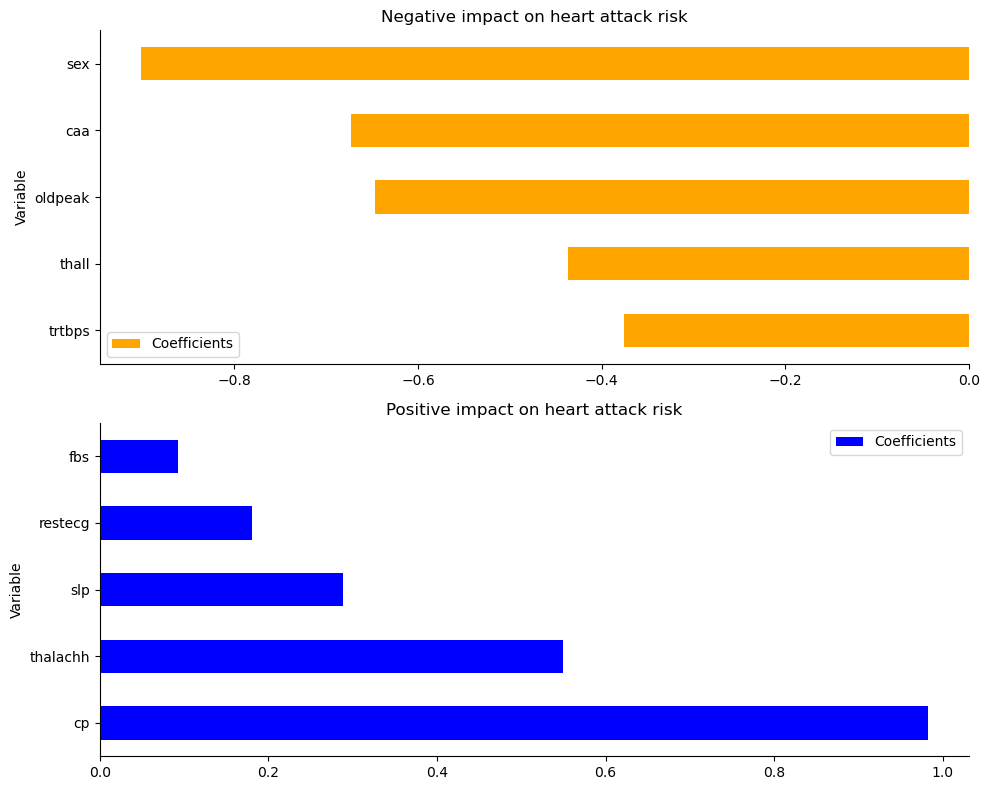

In [27]:
# Visualizing feature importance using the coefficients of the features
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# smallest coefficient -> tokens indicating negative coefficients 
coef_df.tail(5).set_index("Variable").plot(kind="barh", ax=axs[0], color="orange")
axs[0].set_title("Negative impact on heart attack risk")
 
    
# largest coefficient -> tokens indicating positive coefficients 
coef_df.head(5).set_index("Variable").plot(kind="barh", ax=axs[1], color="blue")
axs[1].set_title("Positive impact on heart attack risk")
    
sns.despine()
plt.tight_layout()
plt.show()

**TOP FIVE FEATURES THAT HAVE THE HIGHEST IMPACT ON INCREASING HEART ATTACK CHANCES:**
- chest pain type
- maximum heart rate achieved
- slope
- restecg
- fasting blood sugar > 120mg/dl

**TOP FIVE FEATURES THAT HAVE THE HIGHEST IMPACT ON DECREASING HEART ATTACK CHANCES:**
- sex of patients
- Number of major vessels
- oldpeak
- Thalium Stress Test result ~ (0,3)
- Resting blood pressure (in mm Hg)

In [28]:
# Training confusion matrix
print("Train:")
print(confusion_matrix(y_train, y_pred_train))

# Test confusion matrix
print("Test:")
print(confusion_matrix(y_test, y_pred_LR))

Train:
[[ 82  21]
 [ 10 114]]
Test:
[[28  7]
 [ 5 36]]


In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred_LR)
# label rows and columns
confusion_df = pd.DataFrame(
    confusion_matrix, 
    columns=["Predicted high chance of heart attack", "Predicted low chance of heart attack"],
    index=["True high chance of heart attack", "True low chance of heart attack"]
)

display(confusion_df)

Predicted high chance of heart attack  \
True high chance of heart attack                                     28   
True low chance of heart attack                                       5   

                                  Predicted low chance of heart attack  
True high chance of heart attack                                     7  
True low chance of heart attack                                     36

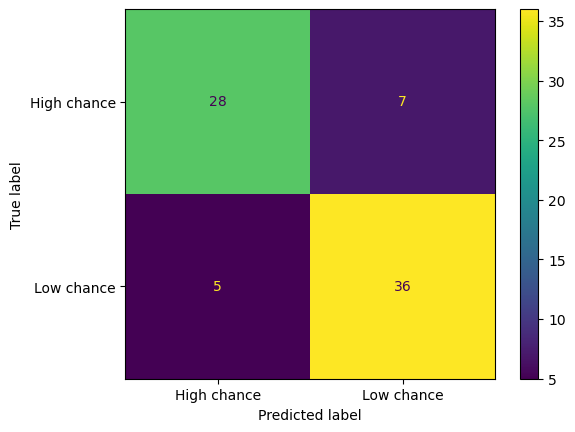

In [30]:
# using confusion_matrix_display - set display_labels parameter for class names
plot_confusion_matrix(logreg, X_test, y_test, display_labels=["High chance", "Low chance"])
plt.show()

In [31]:
# Checking the classification report
print(classification_report(y_test, y_pred_LR, target_names=["High chance", "Low chance"]))

              precision    recall  f1-score   support

 High chance       0.85      0.80      0.82        35
  Low chance       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



### Fitting a Decision Tree Model

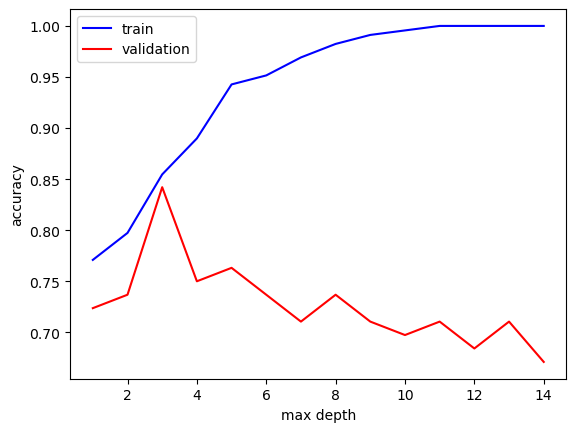

In [32]:
depths = list(range(1, 15))
train_scores = []
validation_scores = []

for d in depths:
    
    DT = DecisionTreeClassifier(max_depth = d)
    DT.fit(X_train, y_train)
    
    # Evaluate
    train_scores.append(DT.score(X_train, y_train))
    validation_scores.append(DT.score(X_test, y_test))
    
plt.figure()
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [33]:
# The optimal value of the maximum depth is 3 which is where the two lines are closest
DT = DecisionTreeClassifier(max_depth = 3, random_state=42)

# Fit the model
DT.fit(X_train, y_train)

# Make predictions 
y_pred_train = DT.predict(X_train)
y_pred_DT = DT.predict(X_test)

# The Root Mean Squared Error for test set
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_DT, squared=False))
print(f'Test MAE ---- {mean_absolute_error(y_test, y_pred_DT)}')
print(f"DT Train score: {DT.score(X_train, y_train)}")
print(f"DT Test score: {DT.score(X_test, y_test)}")

DT_accuracy = DT.score(X_test, y_test)
DT_RMSE = mean_squared_error(y_test, y_pred_DT, squared=False)

Root Mean squared error: 0.40
Test MAE ---- 0.15789473684210525
DT Train score: 0.8546255506607929
DT Test score: 0.8421052631578947


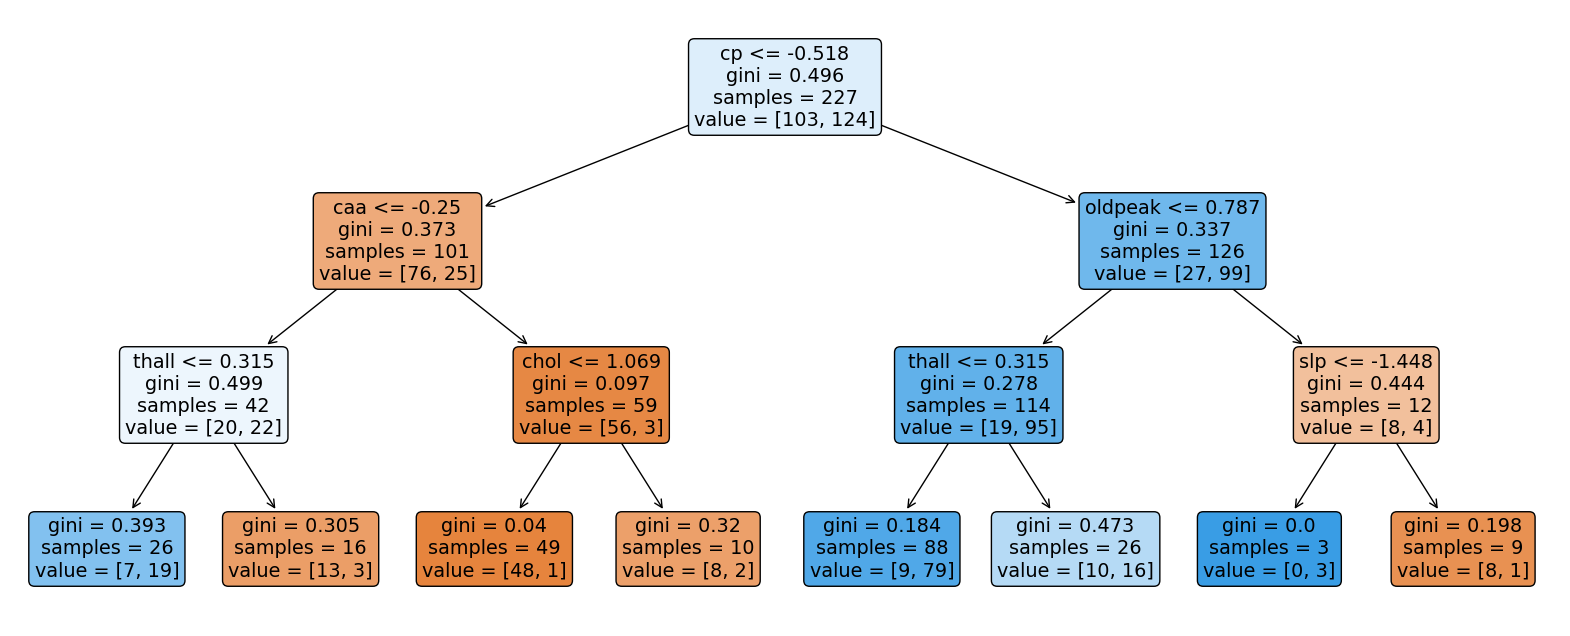

In [34]:
# Visualizing the decision tree
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20,8))

plot_tree(DT,
          feature_names=X_train.columns,
          rounded=True,
          impurity=True,
          filled=True,
          ax=ax)

plt.show()

In [35]:
# Checking and Placing the feature importances in a dataframe
importances_df = pd.DataFrame({'Variable': X_train.columns,
                               'Importance': DT.tree_.compute_feature_importances(normalize=True)
                               })

importances_df.sort_values(by='Importance', ascending=False, inplace=True, ignore_index=True)

importances_df

Variable  Importance
0         cp    0.523650
1        caa    0.176985
2      thall    0.145866
3    oldpeak    0.087531
4        slp    0.057330
5       chol    0.008638
6        age    0.000000
7        sex    0.000000
8     trtbps    0.000000
9        fbs    0.000000
10   restecg    0.000000
11  thalachh    0.000000
12      exng    0.000000

<Figure size 1000x800 with 0 Axes>

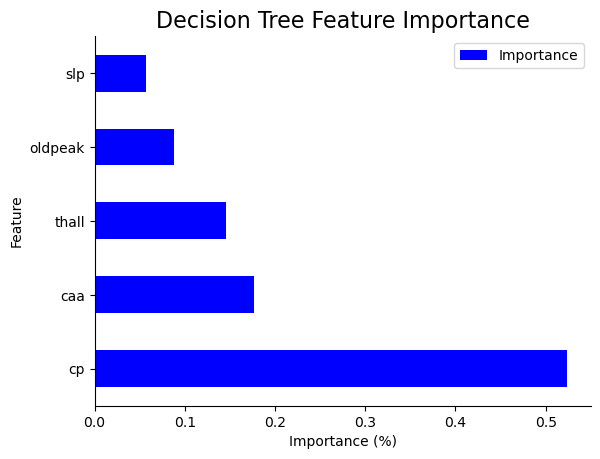

In [36]:
# Visualize the feature importance
plt.figure(figsize=(10,8))
importances_df.head(5).set_index("Variable").plot(kind="barh", color="blue")
plt.title('Decision Tree Feature Importance', fontsize=16)
plt.ylabel('Feature')
plt.xlabel('Importance (%)')
sns.despine()
plt.show()

We can see that the top 3 most important features in the df are:

- chest pain
- Number of major vessels
- Thalium Stress Test result ~ (0,3)

In [37]:
# Training confusion matrix
from sklearn.metrics import confusion_matrix

print("Train:")
print(confusion_matrix(y_train, y_pred_train))

# Test confusion matrix
print("Test:")
print(confusion_matrix(y_test, y_pred_DT))

Train:
[[ 77  26]
 [  7 117]]
Test:
[[28  7]
 [ 5 36]]


In [38]:
confusion_matrix = confusion_matrix(y_test, y_pred_DT)
# label rows and columns
confusion_df = pd.DataFrame(
    confusion_matrix, 
    columns=["Predicted high chance of heart attack", "Predicted low chance of heart attack"],
    index=["True high chance of heart attack", "True low chance of heart attack"]
)

display(confusion_df)

Predicted high chance of heart attack  \
True high chance of heart attack                                     28   
True low chance of heart attack                                       5   

                                  Predicted low chance of heart attack  
True high chance of heart attack                                     7  
True low chance of heart attack                                     36

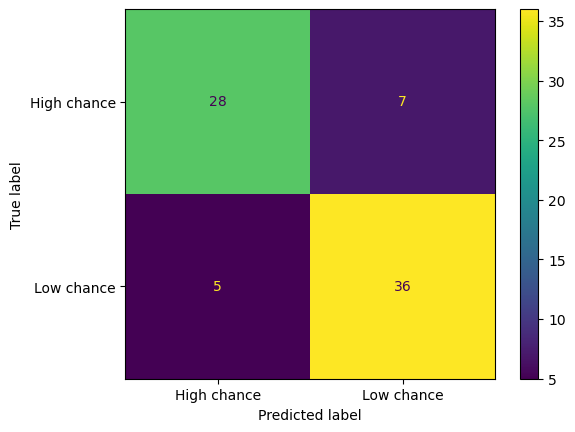

In [39]:
# using confusion_matrix_display - set display_labels parameter for class names
plot_confusion_matrix(DT, X_test, y_test, display_labels=["High chance", "Low chance"])
plt.show()

In [40]:
# Checking the classification report for Decision Treee
print(classification_report(y_test, y_pred_DT, target_names=["High chance", "Low chance"]))

              precision    recall  f1-score   support

 High chance       0.85      0.80      0.82        35
  Low chance       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



**Observations**
- The Logistic regression and decision tree models seem to be giving the same results, I will use ensemble and boosting to fit a different model

### FITTING AN  eXTREME GRADIENT BOOSTING( XGBOOST) CLASSIFIER MODEL

In [41]:
# Use grid search to find best parameters for the model
from sklearn.model_selection import GridSearchCV

my_xgb = XGBClassifier(n_jobs=-1)

param_grid = {'n_estimators': np.arange(1,1000, 10), 'max_depth': np.arange(1,5)}
grid_xgb = GridSearchCV(my_xgb, param_grid=param_grid, verbose=1, n_jobs=-1)

grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 59

In [42]:
# Best estimator
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=41,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [43]:
# Best hyperparameters for XGB model
grid_xgb.best_params_

{'max_depth': 1, 'n_estimators': 41}

In [44]:
# Using the best model parameter
XGB =  XGBClassifier(objective='binary:logistic', colsample_bytree=1, learning_rate=0.3, max_depth=1, n_estimators=41)

In [45]:
# fitting the XGBoost model
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=1, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=41, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
# Model Predictions for train and validation set
y_train_pred = XGB.predict(X_train)
y_pred_XGB = XGB.predict(X_test)

# The Root Mean Squared Error for test set
print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_XGB, squared=False))
print(f'Test MAE ---- {mean_absolute_error(y_test, y_pred_XGB)}')
print(f"XGB Train score: {XGB.score(X_train, y_train)}")
print(f"XGB Test score: {XGB.score(X_test, y_test)}")

XGB_accuracy = XGB.score(X_test, y_test)
XGB_RMSE = mean_squared_error(y_test, y_pred_XGB, squared=False)

Root Mean squared error: 0.38
Test MAE ---- 0.14473684210526316
XGB Train score: 0.8678414096916299
XGB Test score: 0.8552631578947368


In [47]:
# Training confusion matrix
from sklearn.metrics import confusion_matrix

print("Train:")
print(confusion_matrix(y_train, y_train_pred))

# Test confusion matrix
print("Test:")
print(confusion_matrix(y_test, y_pred_XGB))

Train:
[[ 84  19]
 [ 11 113]]
Test:
[[30  5]
 [ 6 35]]


In [48]:
confusion_matrix = confusion_matrix(y_test, y_pred_XGB)
# label rows and columns
confusion_df = pd.DataFrame(
    confusion_matrix, 
    columns=["Predicted high chance of heart attack", "Predicted low chance of heart attack"],
    index=["True high chance of heart attack", "True low chance of heart attack"]
)

display(confusion_df)

Predicted high chance of heart attack  \
True high chance of heart attack                                     30   
True low chance of heart attack                                       6   

                                  Predicted low chance of heart attack  
True high chance of heart attack                                     5  
True low chance of heart attack                                     35

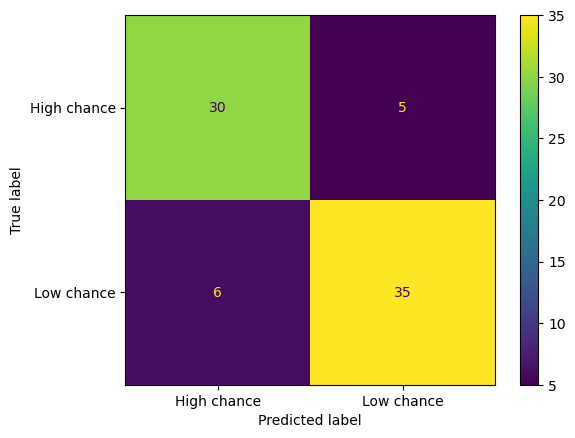

In [49]:
# using confusion_matrix_display - set display_labels parameter for class names
plot_confusion_matrix(XGB, X_test, y_test, display_labels=["High chance", "Low chance"])
plt.show()

In [50]:
# Checking the classification report for XGBoost
print(classification_report(y_test, y_pred_XGB, target_names=["High chance", "Low chance"]))

              precision    recall  f1-score   support

 High chance       0.83      0.86      0.85        35
  Low chance       0.88      0.85      0.86        41

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



### FITTING A NEURAL NETWORK (using Adam optimizer)

- Build a neural network model using 4 hidden layers with 20 nodes for the first 2 layers and 10 nodes for the rest (use ReLU activations)
- To control overfitting, apply 10% dropout in-between each dense layer
- Use sigmoid activation for the output layer
- Compile the model with Adam optimizer and appropriate loss function and metrics for the model. 
- Train the model for 50 epochs

In [51]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(20, activation="relu"))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(10, activation="relu"))
model.add(layers.Dropout(0.1))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

In [52]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)                

In [53]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=0) 

In [54]:
# Get the model summary for total number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [55]:
# Get the accuracy of train set
train_accuracy = history.history["binary_accuracy"][-1]
print(f"Train Accuracy: {train_accuracy:.4f}")

# Evaluate with test set
result = model.evaluate(X_test,y_test, verbose=0)
print(f"Test Accuracy: {result[1]:.4f}") 

ANN_accuracy = result

Train Accuracy: 0.8546
Test Accuracy: 0.8158


In [56]:
# Get the prediction value
y_pred_ANN = model.predict(X_test).round().astype(int)

print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_ANN, squared=False))
print(f'Test MAE ---- {mean_absolute_error(y_test, y_pred_ANN)}')

ANN_RMSE = mean_squared_error(y_test, y_pred_ANN, squared=False)

3/3 [==============================] - 0s 2ms/step
Root Mean squared error: 0.43
Test MAE ---- 0.18421052631578946


In [57]:
# Training confusion matrix
from sklearn.metrics import confusion_matrix

# Test confusion matrix
print("Test:")
print(confusion_matrix(y_test, y_pred_ANN))

Test:
[[28  7]
 [ 7 34]]


In [58]:
confusion_matrix = confusion_matrix(y_test, y_pred_ANN)
# label rows and columns
confusion_df = pd.DataFrame(
    confusion_matrix, 
    columns=["Predicted high chance of heart attack", "Predicted low chance of heart attack"],
    index=["True high chance of heart attack", "True low chance of heart attack"]
)

display(confusion_df)

Predicted high chance of heart attack  \
True high chance of heart attack                                     28   
True low chance of heart attack                                       7   

                                  Predicted low chance of heart attack  
True high chance of heart attack                                     7  
True low chance of heart attack                                     34

In [59]:
# Checking the classification report for XGBoost
print(classification_report(y_test, y_pred_ANN, target_names=["High chance", "Low chance"]))

              precision    recall  f1-score   support

 High chance       0.80      0.80      0.80        35
  Low chance       0.83      0.83      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



## Comparing Accuracies and RMSE for best model performance

In [60]:
accuracies={"Logistic regression": LR_accuracy,
            "Decision Tree": DT_accuracy,
            "XGBoost": XGB_accuracy,
            "Neural Network": ANN_accuracy}

acc_df = pd.DataFrame(accuracies).T
acc_df. drop(columns=0)

1
Logistic regression  0.842105
Decision Tree        0.842105
XGBoost              0.855263
Neural Network       0.815789

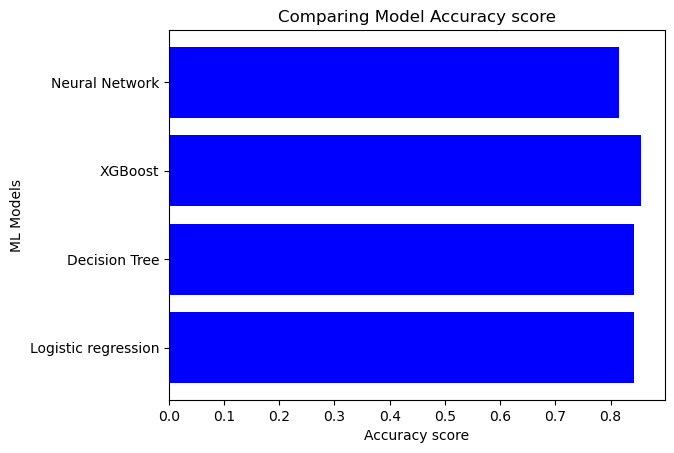

In [61]:
plt.barh(acc_df.index, acc_df[1], color = 'blue')
plt.xlabel('Accuracy score')
plt.ylabel('ML Models')
plt.title("Comparing Model Accuracy score")
plt.show()

## BEST MODEL CHOICE
** There is just a slightly better performance seen in the XGBoost model with an accuracy score of 85.5% and a RMSE of 0.38 which is the lowest as well. 
- The XGBoost model gave a higher recall for high chance of heart attack prediction and the values across the diagonal of the confusion matrix is the highest of all the models
- The model will be able to notify patients who have higher risk of a heart attack quickly which is great
- The neural network model isn't a good choice because neural network models train and learn better with larger datasets. We can see possibility of overfitting as every time the notebook is run, the accuracy score changes which is inconsistent

**XGBOOST model is the best choice**

In [62]:
# use joblib to pickle the best model for future use
joblib.dump(grid_xgb.best_estimator_, 'pickled_best_XGB.pkl')

['pickled_best_XGB.pkl']

In [63]:
# Sanity check on the pickled model
pickled_best_XGB = joblib.load('pickled_best_XGB.pkl')

# Print the accuracies
print(f"The best XGB accuracy on the train set: {pickled_best_XGB.score(X_train, y_train)}")
print(f"The best XGB accuracy on the test set: {pickled_best_XGB.score(X_test, y_test)}")

The best XGB accuracy on the train set: 0.8678414096916299
The best XGB accuracy on the test set: 0.8552631578947368


## MODEL INTERPRETATION USING SHAP VALUES
In order to interpret model predictions, we would use a model-agnostic method. This method, instead of describing the average behaviour of a machine learning model, will try to explain individual predictions. The model being used is SHapley Additive ExPlanations, or SHAP.

**SHAP** uses Shapley values to explain individual predictions

- Shapley value is the average marginal contribution of a feature value across all possible coalition. The Shapley value is the feature contribution to the prediction of the target variable

In [64]:
%%time 
# Interprete using Shapley values

# Fit tree-specific kernel for SHAP  
explainer = shap.TreeExplainer(XGB)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train)

Wall time: 18.3 ms


In [65]:
# Initiate Javascript for visualization 
shap.initjs()

# Plot SHAP values for row 0 
shap.force_plot(explainer.expected_value,       # Plots the average prediction on the plot
                shap_values[0],                 # Plots the Shapley values on the force plot 
                features=X_train.iloc[0],       # 'features' displays the value that is passed to it on the plot; feature value plotted for easier interpretation
                feature_names=X_train.columns)  # 'feature_names' displays the name of the features

**Observations**:
- This shows the first row of the data, which is patient no.1
- Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue
- We can see here that chest pain type, exercise induced angina and resting blood pressure all push for a higher prediction of heart attack chances
- For this patient, there is a 50% chance of heart attack

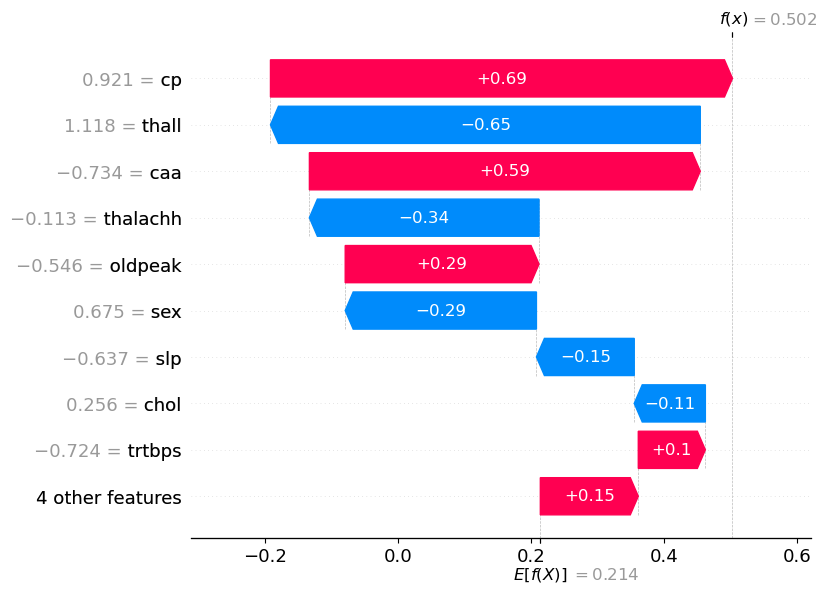

In [66]:
shap.waterfall_plot(shap.Explanation(values = shap_values[0], 
                                     base_values = explainer.expected_value, 
                                     data = X_train.iloc[0],  
                                     feature_names = X_train.columns.tolist()))

- We see that as chest pain, resting blood pressure increases, there is higher chance of a heart attack occurence

** The global SHAP values show the features that contribute to the prediction of heart attack in the data set

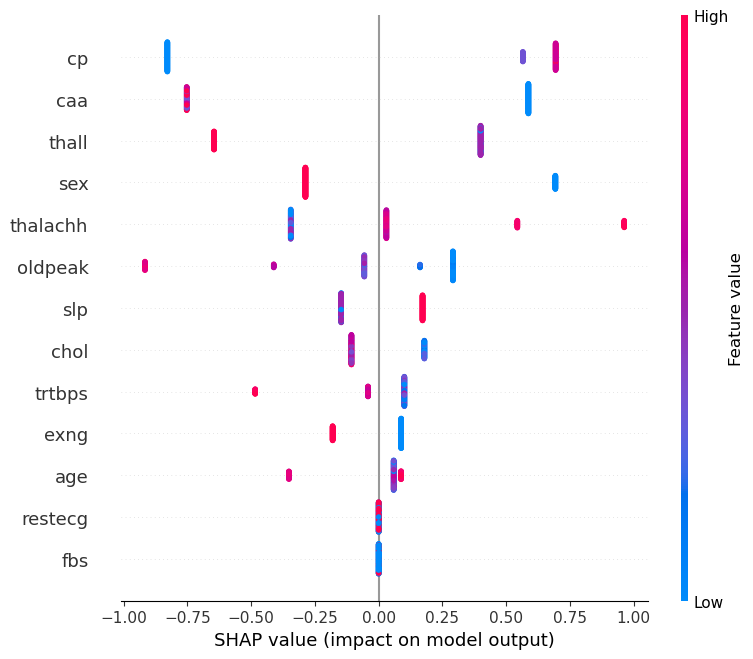

In [67]:
# Global interpretation - summary plot - type = 'dot'
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

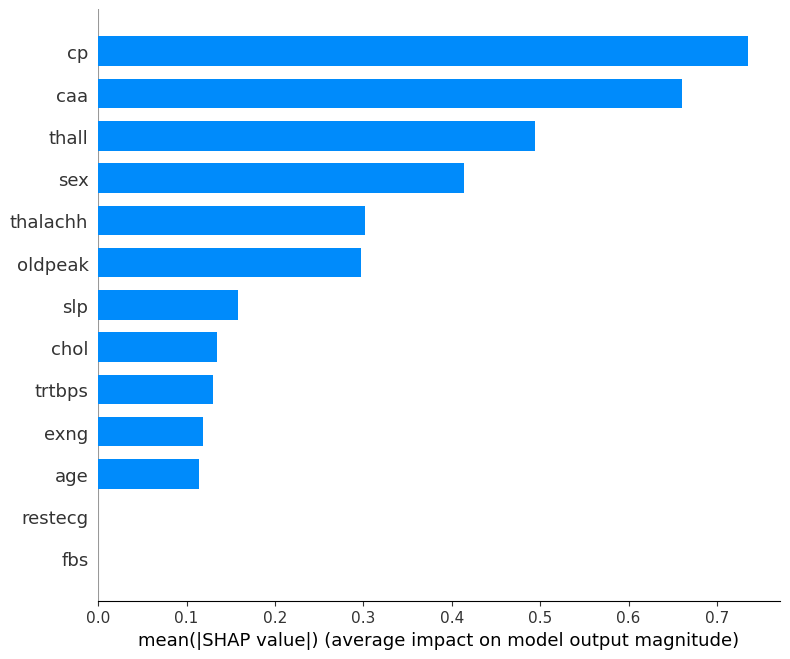

In [68]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

**IMPORTANT FEATURES NOTED**
- **Chest pain**
- **Sex of the patient**
- **Thallium stress test result**
- **Number of major vessels** are major features that predict high chances of heart attack

In [69]:
# Saving model for deployment
with open("pickled_best_XGB.pkl", "wb") as pickle_out:
    pickle.dump(grid_xgb.best_estimator_, pickle_out)